# Model Fitness: Cadena de gimnasios

<a id=indice></a>
# Tabla de Contenido

[1 Descripción del Proyecto](#descripcion)

[2 Lectura y preparación de datos](#preparacion_data)

[3 Análisis y exploración de datos](#analisis_data)

[4 Construcción de un modelo para predecir la cancelación de usuarios](#creacion_modelo_predictivo)

[5 Clústeres de usuarios/as](#creacion_clusteres)

[6 Conclusiones y recomendaciones](#conclusiones)

<a id=descripcion></a>
## Descripción del Proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos. 

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas. 

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado. 

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese. 

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes. 

Tienes que:

1 Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.

2 Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.

3 Analizar los factores que más impactan la pérdida.

4 Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
* identificar a los grupos objetivo
* sugerir medidas para reducir la rotación
* describir cualquier otro patrón que observes con respecto a la interacción con los clientes

[Volver a la Tabla de Contenido](#indice)

<a id="preparacion_data"></a>
## Lectura y Preparación de datos

### Descripción de datos

El dataset proporcionado para el proyecto contiene los siguientes campos:

Campo General:
* Churn: la cancelación para el mes en cuestión

Campos relacionados a la información del usuario:
* gender
* Near_Location: si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
* Partner: si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
* Promo_friends: si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
* Phone: si el/la usuario/a aportó el número de teléfono.
* Age
* Lifetime: el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

Campos relacionados al registro de visitas, compras y datos sobre el estado actual de la membresía de cada usuario:
* Contract_period: 1 mes, 3 meses, 6 meses o 1 año.
* Month_to_end_contract: los meses que faltan hasta que expire el contrato.
* Group_visits: si el/la usuario/a participa en sesiones grupales.
* Avg_class_frequency_total: frecuencia media de visitas por semana a lo largo de la vida del cliente.
* Avg_class_frequency_current_month: frecuencia media de visitas por semana durante el mes en curso.
* Avg_additional_charges_total: cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

### Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier #libreria para usar el método de bosque aleatorio
from sklearn.linear_model import LogisticRegression #libreria para usar el método de regresión logística
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

### Carga de datos

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv', sep=',')

gym.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Revisión de datos (duplicados, nulos y tipo de datos)

#### Visualizamos el detalle de la tabla "gym"

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

#### Validamos la existencia de valor duplicados

In [4]:
print('Número de duplicados: ', gym.duplicated().sum())

Número de duplicados:  0


#### Validamos la existencia de valores nulos

In [5]:
print('Valores Nulos:')
gym.isna().sum()

Valores Nulos:


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

#### Hacemos una previsualización de la tabla

In [6]:
gym.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Se observa lo siguiente:
* No hay existencia de valores duplicados ni nulos o ausentes.
* Se observa que los nombres de columnas tienen letras entre minusculas y mayusculas lo cual hace que no sea facil de manejar la información. Por lo que cambiaremos los nombres de las columnas usando "snake case" para una mejor lectura.
* Los campos "gender", "near_location", "partner", "promo_friends", "phone", "group_visits", "churn" al tener valores binarios los interpretaremos de la siguiente manera: i) Para el campo "gender" asumiremos que "0" hace referencia a "masculino" y el valor "1" para el "femenino" ii) Para los campos restantes los valores se interpretarán como "1" igual a verdadero y "0" a falso.

In [7]:
# Renombramos el nombre de las columnas
gym.columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total',
               'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Visualizamos la tabla gym luego de los cambios

In [8]:
gym.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


[Volver a la Tabla de Contenido](#indice)

<a id="analisis_data"></a>
## Análisis exploratorio de datos

### Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [9]:
# Visualizamos la información estadística de la tabla "gym"
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Se observa lo siguiente:
- La muestra contiene equidad de género, 50% aprox corresponde a cada género.
- Los usuarios en su mayoría viven cerca a la locación del gimnasio.
- La mayoría de usuarios pertenece a una empresa asociada con el gimnasio.
- La mayoría de usuarios dejo su contacto de celular.
 - El contrato de membresía suele realizarse a 1 mes (el 50% se registra bajo esa modalidad), seguido de los que se registran a 6 meses (25% del total) y un  25% a 12 meses.
- Hay mayor cantidad de usuarios que no participan de clases grupales.
- El rango de edad de los usuarios oscila entre 18 y 41 años, donde la edad promedio es de 29 años.
- La compras adicionales que realizan los clientes oscilan entre $0.14 y $553.
- La mayor cantidad de usuarios tiene la membresía activa.

### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()). 

In [10]:
# Calcularemos los valores medios para las características que no sean variables cualitativas.
churn_users = gym.groupby('churn').agg({'contract_period':'mean', 'age':'mean','avg_additional_charges_total':'mean', 'month_to_end_contract':'mean',
                                        'lifetime':'mean', 'avg_class_frequency_total':'mean', 'avg_class_frequency_current_month':'mean'})

churn_users.head(5)

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,
0,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Partiendo de que churn en 0 significa membresía activa y 1 membresía anulada, se observa que:
- Los usuarios con membresías activas tienden a contratar sus membresías a 6 meses, mientras que los anulan lo hacen a 1 mes.
- La edad promedio de usuarios que mantienen sus membresías activas (30 años) son mayores a los de membresía anulada (27 años).
- Los usuarios con membresía activa tiene un consumo promedio mayor a los de membresía anulada.
- La cantidad de meses para que finalice el contrato de cada usuario es mayor en los usuarios con membresía activa.
- El tiempo promedio de los usuarios con membresía activa es mayor.
- Semanalmente, la cantidad de clases promedio a la que asisten los usuarios con membresía activa es mayor. Y tiene una tendencia similar a la cantidad de clases por semana del mes en curso.

### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron. 

Graficaremos histogramas de distribuciones, diferenciando si cancelaron sus membresías. Tomando en cuenta a las características no categorícas.
- age
- lifetime
- contract_period
- month_to_end_contract
- avg_class_frequency_total
- avg_class_frequency_current_month
- avg_additional_charges_total

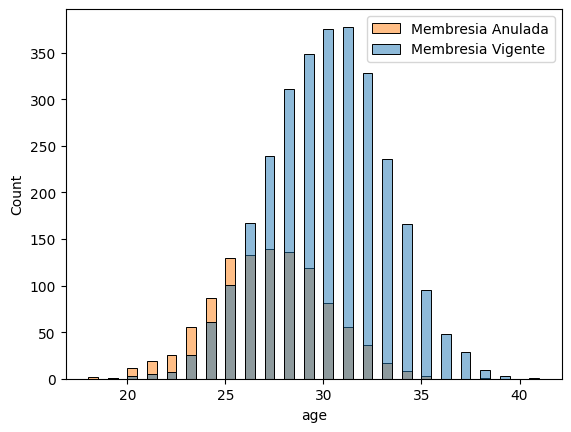

In [11]:
# Gráfica de histograma para el campo "age"
sns.histplot(x='age', data=gym, hue='churn')
plt.legend(labels=['Membresia Anulada', 'Membresia Vigente'])

Se observa que la cantidad de personas que van al gimnasio y tienen membresia vigente se concentra entre las edades de 25 y 35 años.

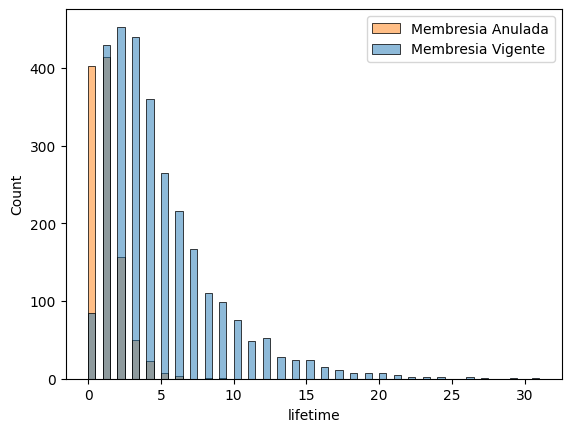

In [12]:
# Gráfica de histograma para el campo "lifetime"
sns.histplot(x='lifetime', data=gym, hue='churn')
plt.legend(labels=['Membresia Anulada', 'Membresia Vigente'])

La mayoría de usuarios permanece con su membresía activa por lo menos 4 meses. Excepcionalmente hay algunos usuarios que la han mantenido hasta 31 meses.

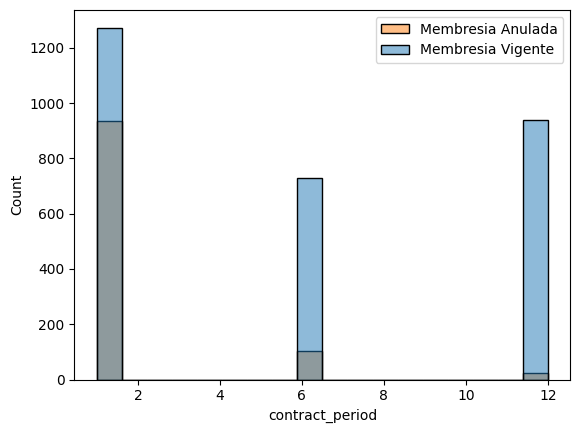

In [13]:
# Gráfica de histograma para el campo "contract_period"
sns.histplot(x='contract_period', data=gym, hue='churn')
plt.legend(labels=['Membresia Anulada', 'Membresia Vigente'])

Los usuarios con contrato de membresía de 6 y 12 meses son los que permanecen en el gimnasio, mientras que los que contratan a 1 mes terminan por anularla.

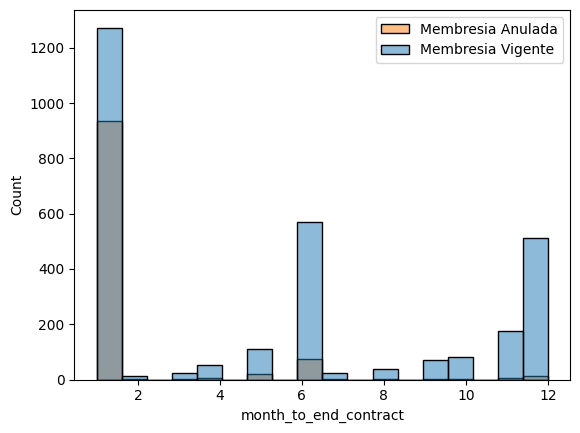

In [14]:
# Gráfica de histograma para el campo "month_to_end_contract"
sns.histplot(x='month_to_end_contract', data=gym, hue='churn')
plt.legend(labels=['Membresia Anulada', 'Membresia Vigente'])

Los usuarios que le quedan 1 mes por finalizar su contrato son los que terminan anulando su membresía, mientras que los que le queda de 6 a más meses se mantienen.

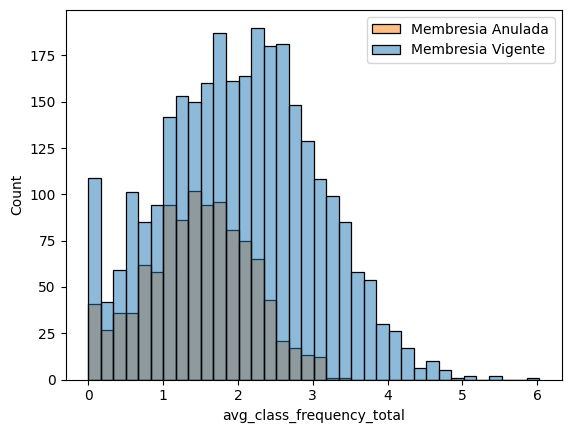

In [15]:
# Gráfica de histograma para el campo "avg_class_frequency_total"
sns.histplot(x='avg_class_frequency_total', data=gym, hue='churn')
plt.legend(labels=['Membresia Anulada', 'Membresia Vigente'])

Mientras más cantidad de días va el usuario al gimnasio mayor cantidad de usuarios con membresia vigente se tienen.

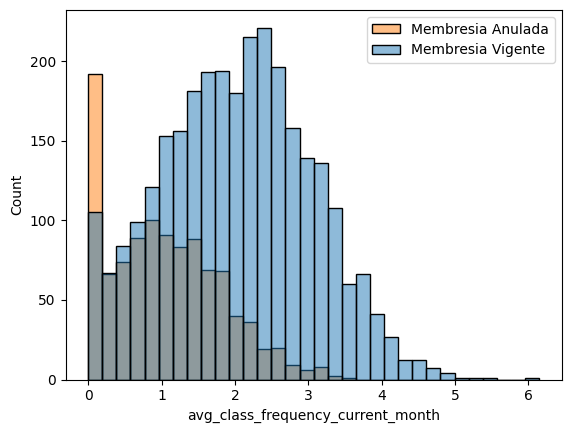

In [16]:
# Gráfica de histograma para el campo "avg_class_frequency_current_month"
sns.histplot(x='avg_class_frequency_current_month', data=gym, hue='churn')
plt.legend(labels=['Membresia Anulada', 'Membresia Vigente'])

Los usuarios que no asisten o van 1 a 2 veces a la semana al gimnasio durante el último mes son los que terminan cancelando su membresía. Mientras que los que van más de 2 veces mantienen su membresía vigente.

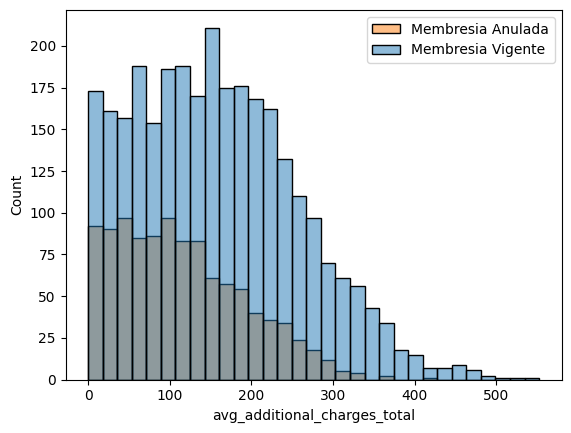

In [17]:
# Gráfica de histograma para el campo "avg_additional_charges_total"
sns.histplot(x='avg_additional_charges_total', data=gym, hue='churn')
plt.legend(labels=['Membresia Anulada', 'Membresia Vigente'])

Se observa que los clientes con membresias activas son los que más han consumido en promedio; sin embargo, eso podría verse impactado porque al permanecer más tiempo en el gimnasio su gasto acumulado sería mayor.

### Crea una matriz de correlación y muéstrala.

In [18]:
# Visualizamos matriz de correlación
corr_gym = gym.corr()
corr_gym

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


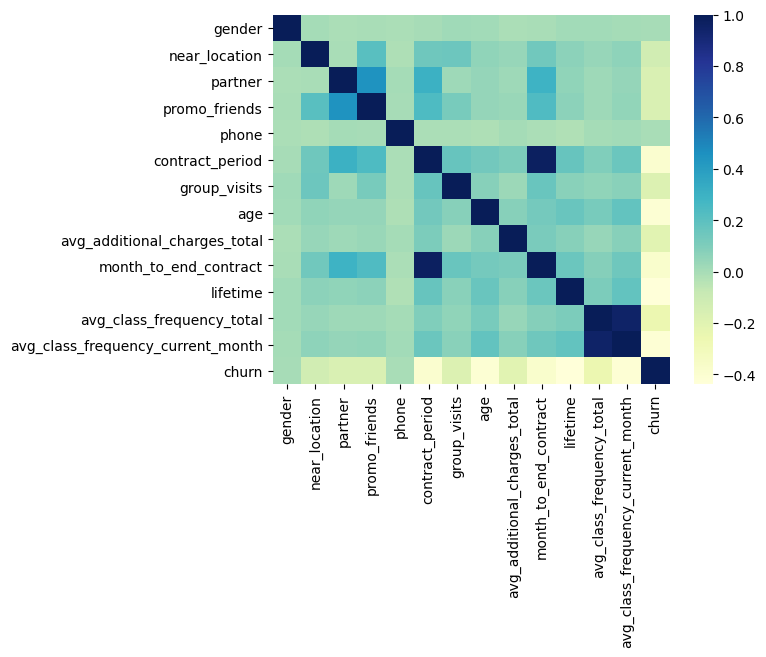

In [19]:
# Graficamos la matriz de correlación usando heatmap
sns.heatmap(data=corr_gym, cmap="YlGnBu")
plt.show()

De la gráfica de correlación sobresale las siguientes características para su alto porcentaje de correlación:
- contract_period vs month_to_end_contract
- avg_class_frequency_current_month vs avg_class_frequency_total

[Volver a la Tabla de Contenido](#indice)

<a id=creacion_modelo_predictivo></a>
## Construcción de un modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente. 

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split(). 

In [20]:
# Creamos las matrices de características y el vector con la variable objetivo
X = gym.drop('churn', axis=1)
y = gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Estandarizamos los datos antes de empezar a entrenar el modelo
scaler = StandardScaler()
# Entrenamos el scaler y transformamos la matriz para el entrenamiento
X_train_st = scaler.fit_transform(X_train)
# Aplicamos la estandarización a la matriz de característica para el test de prueba
X_test_st = scaler.transform(X_test)

### Entrena el modelo en el set de entrenamiento con dos métodos: regresión logística y bosque aleatorio.

####  Entrenando al modelo con el método "regresión logística"

In [21]:
# Definimos el modelo
model_a = LogisticRegression(random_state=0)

# Entrenamos el modelo
model_a.fit(X_train_st, y_train)

# Hallando predicciones
predictions_a = model_a.predict(X_test_st)
probabilities_a = model_a.predict_proba(X_test_st)

#### Entrenando al modelo con el método "bosque aleatorio"

In [22]:
# Definimos el modelo
model_b = RandomForestClassifier(random_state=0)

# Entrenamos el modelo
model_b.fit(X_train_st, y_train)

# Hallando predicciones
predictions_b = model_b.predict(X_test_st)
probabilities_b = model_b.predict_proba(X_test_st)

### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

#### Métricas para el modelo con el método "regresión logística"

In [23]:
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_a)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_a)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_a)))

Exactitud: 0.92
Precisión: 0.85
Recall: 0.83


#### Métricas para el modelo con el método "bosque aleatorio"

In [24]:
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_b)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_b)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_b)))

Exactitud: 0.92
Precisión: 0.84
Recall: 0.81


Los resultados de la evaluación entre los dos métodos, se observa que el mejor método es el de "regresión logística".
Si bien las métricas de exactitud y precisión son muy parecidas, la métrica recall si se observa una diferencia, siendo la del modelo de "regresión logística" más cercano a 1 (mejor).

[Volver a la Tabla de Contenido](#indice)

<a id="creacion_clusteres"></a>
## Creación de clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as): 

### Estandarizando los datos
Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar. 

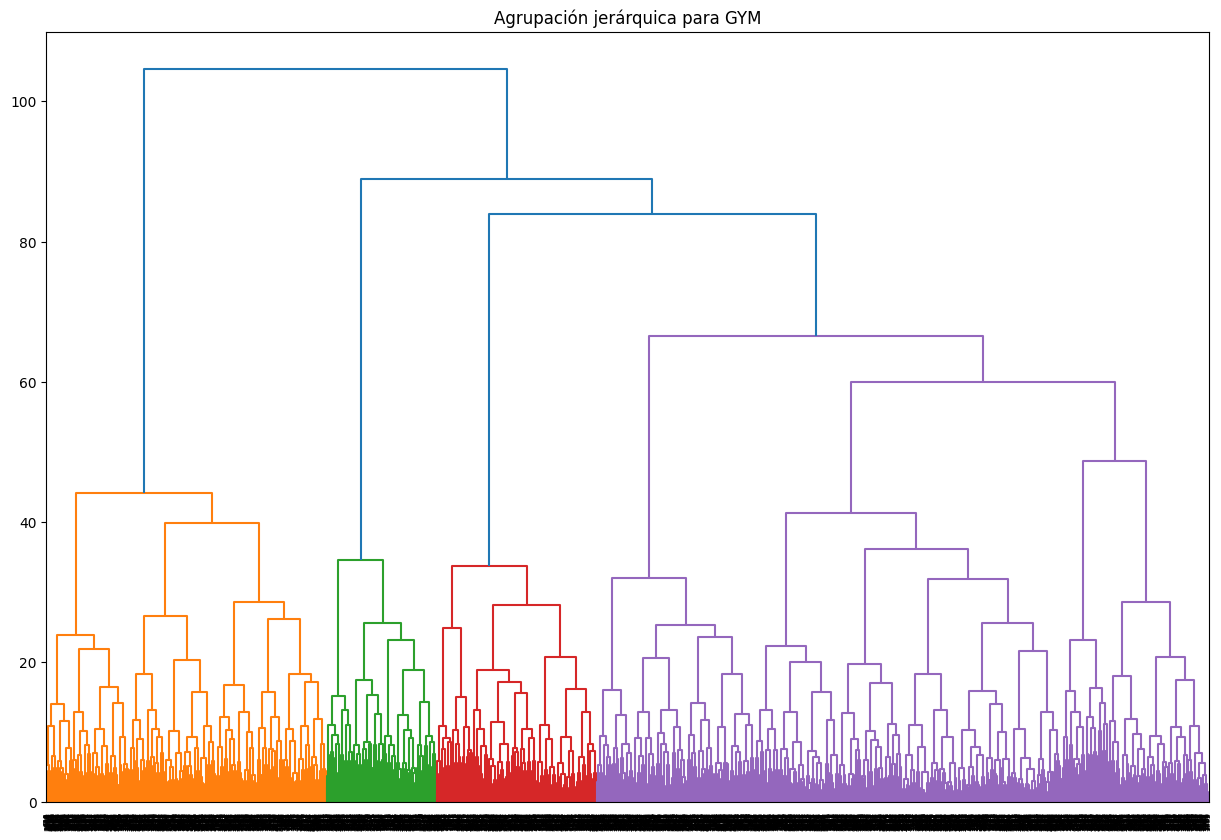

impreso


In [25]:
# Estandarizamos la matriz usando "linkage"
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method='ward')

# Visualizamos como un dendograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()
print('impreso')

En el dendograma se observa 5 clusteres bien marcados, por lo que podríamos entrenar el modelo considerando este número de clusteres.

### Entrenamos el modelo de clustering con el algortimo K-means y predecimos los clústeres de clientes.
Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención? 

In [26]:
# Definimos el modelo KMeans con 5 clústeres
km = KMeans(n_clusters=5, random_state=0)

# Aplicamos el algoritmo a los datos para formar un vector de clúster
labels = km.fit_predict(X_sc)

# Almacenamos las etiquetas de datos en una columna nueva en la tabla "gym"
gym['cluster_km'] = labels

# Visualizamos los valores medios de los clusteres
gym.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Me llama la atención que en el cluster 0 se hayan agrupado usuarios que en promedio tienen un contrato de membresia de mayor duración mientras que en el resto de clusteres está más parejo; por otro lado, esto hace que el month_to_end_contract también sea alto. Y si vemos el churn de este cluster, la media es más cercana a cero por lo que nos indica que hay mayor cantidad de usuarios con membresías activas.

Por otro lado, se observa que los clusteres 1, 2 y 3 contienen mayor cantidad de usuarios con membresias anuladas (más cercano a 1) mientras que los clusteres 0 y 4 contienen menor cantidad de usuarios con membresias anuladas.

### Traza distribuciones de características para los clústeres. ¿Notas algo? 

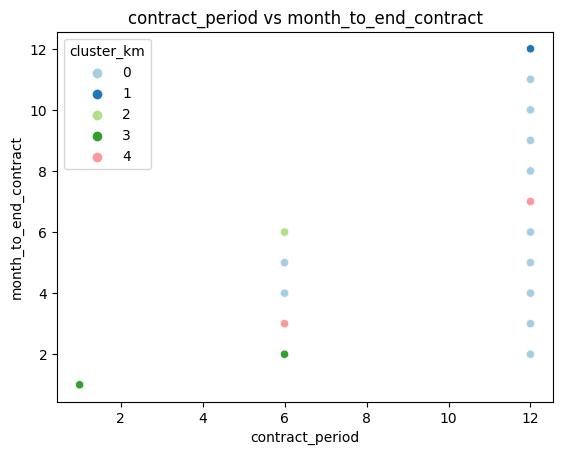

In [27]:
# Graficamos las variables que guardan relación según la gráfica de correlación: contract_period vs month_to_end_contract
sns.scatterplot(x=gym['contract_period'], y=gym['month_to_end_contract'], hue = gym['cluster_km'], palette = 'Paired')
plt.title('{} vs {}'.format('contract_period', 'month_to_end_contract'))
plt.show()

Se observa que a mayor duración del contrato de membresía la cantidad de meses para finalizar el contrato es mayor.

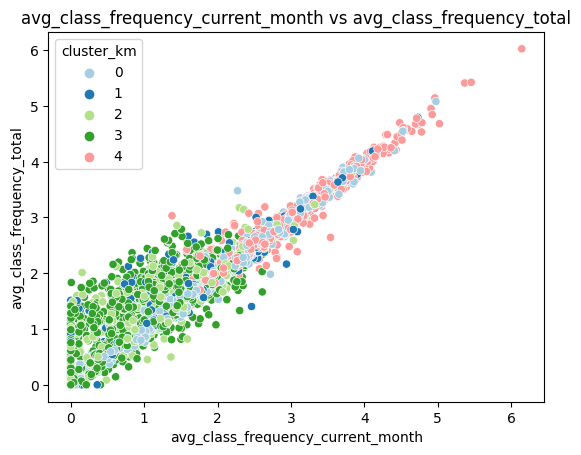

In [28]:
# Graficamos las variables que guardan relación según la gráfica de correlación: avg_class_frequency_current_month vs avg_class_frequency_total
sns.scatterplot(x=gym['avg_class_frequency_current_month'], y=gym['avg_class_frequency_total'], hue = gym['cluster_km'], palette = 'Paired')
plt.title('{} vs {}'.format('avg_class_frequency_current_month', 'avg_class_frequency_total'))
plt.show()

Los clusteres 2 y 3 contiene usuarios que van menos de 2 veces a la semana al gimnasio.
El cluster 4 contiene usuarios donde la frequencia de veces que acude al gimnasio del mes en curso termina marcando su tendencia de frequencia de clases desde el inicio de contrato.

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales? 

In [29]:
gym.groupby(['cluster_km'])['churn'].mean()

cluster_km
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

Según la tasa de cancelación, los grupos más propensos a irse serían el 1, 2 y 3 (más cercano al 1, 0.27, 0.44 y 0.51) mientras que los grupos leales serían los grupos 0 y 4 (0.03 y 0.07).

[Volver a la Tabla de Contenido](#indice)

<a id="conclusiones"></a>
## Conclusiones y recomendaciones

### Conclusiones

Luego de revisar y analizar la información recabada por el gimnasio se concluye lo siguiente:
* Tenemos dos grupos de usuarios identificados: i) con membresía vigente (73%) ii) con membresía anulada (27%).
* Importante información recabada de los usuarios que permitirán definir estrategias diferenciadas son:
    - Proporcional cantidad de usuarios entre el género femenino y masculino (50% c/u).
    - 90% de usuarios dejaron sus telefonos (canal para llegar a los usuarios).
    - 85% viven cerca del gimnasio.
* Las características más importantes que describen a un usuario con probabilidad de mantener su membresía vigente son:
    - Usuario entre 25 a 35 años.
    - Usuario que visita el gimnasio por lo menos 3 veces a la semana durante el último mes y a lo largo de toda su vida desde su inscripción inicial.
    - Uuario que contrata membresía con período de 6 o 12 meses.

### Recomendaciones

* Mantener al grupo de usuarios fieles (clusteres 0 y 4) con descuentos especiales (membresías, cafetería, productos deportivos, cosméticos, masajes, etc.).
* Al grupo de usuarios de los clusteres 1, 2 y 3 cuya probabilidad de cancelar sus membresias es alta, se les sugiere realizar un seguimiento semanal y engancharlos por celular (via whats app) con promociones semanales, ya que la posibilidad de que cancele su membresía en 1 mes es muy alta.
* Por otro lado, hay dos canales donde se observa existe oportunidad de crecimiento vía captación de nuevos usuarios, para los cuales se podría armar una campaña de venta:
    - Por usuario referido, hay un 70% de usuarios que aún no han referido a un amigo (30% viene por referido según la información).
    - Por empresa afiliada, hay un 50% de usuarios que provienen por una empresa afiliada con el gimnasio.

[Volver a la Tabla de Contenido](#indice)